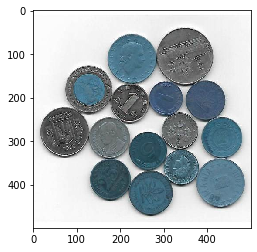

In [42]:
%matplotlib inline
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
img = cv.imread('coins.jpg')
plt.imshow(img)
plt.show()

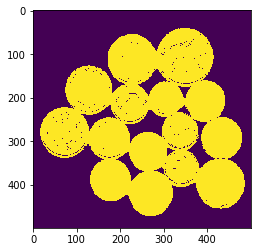

In [43]:
gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
ret, thresh = cv.threshold(gray,0,255,cv.THRESH_BINARY_INV+cv.THRESH_OTSU)
plt.imshow(thresh)
plt.show()

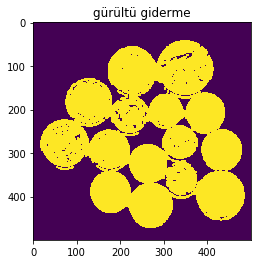

In [44]:
# gürültü giderme
kernel = np.ones((3,3),np.uint8)
opening = cv.morphologyEx(thresh,cv.MORPH_OPEN,kernel, iterations = 2)
plt.title('gürültü giderme')
plt.imshow(opening)
plt.show()

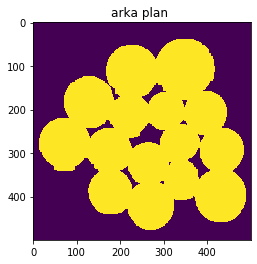

In [45]:
#  arka plan alanı ayarlama
sure_bg = cv.dilate(opening,kernel,iterations=3)
plt.title('arka plan ')
plt.imshow(sure_bg)
plt.show()

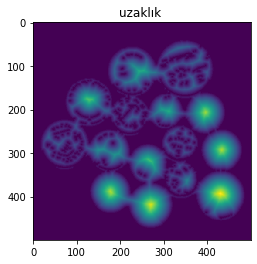

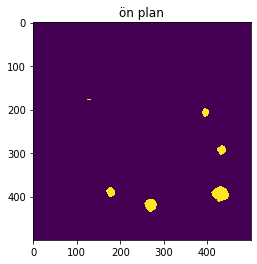

In [46]:
# ön plan alanı bulma
dist_transform = cv.distanceTransform(opening,cv.DIST_L2,5)
ret, sure_fg = cv.threshold(dist_transform,0.7*dist_transform.max(),255,0)
plt.title('uzaklık ')
plt.imshow(dist_transform)
plt.show()
plt.title('ön plan')
plt.imshow(sure_fg)
plt.show()

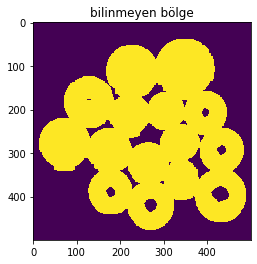

In [47]:

# Bilinmeyen bölgeyi bulma
sure_fg = np.uint8(sure_fg)
unknown = cv.subtract(sure_bg,sure_fg)
plt.title('bilinmeyen bölge')
plt.imshow(unknown)
plt.show()


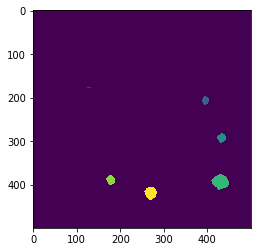

In [48]:
# İşaretçi Etiketleme
ret, markers = cv.connectedComponents(sure_fg)
markers = markers+1
plt.imshow(markers)
plt.show()


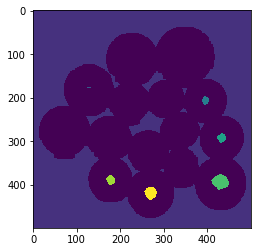

In [49]:
# Bilinmeyen bölgeyi sıfır ile işaretleme
markers[unknown==255] = 0
plt.imshow(markers)
plt.show()

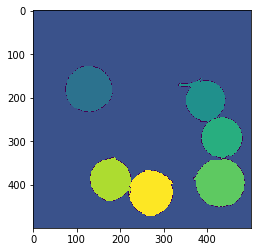

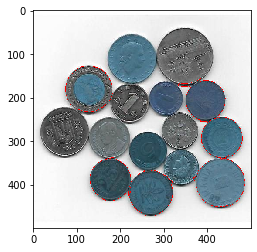

In [50]:
markers = cv.watershed(img,markers)
img[markers == -1] = [255,0,0]
plt.imshow(markers)
plt.show()
plt.imshow(img)
plt.show()